# This is a notebook to import ONIX system data

In [1]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt

By default, data is saved at the path C:\Users\Manip1\Documents\data\
in a folder named "Expe_timestamp"

11 files can be saved at most:
- from the miniscope:
    - frames:
    - timestamps: miniscopeTS_{timestamp}.csv
    - head rotation: heading_{timestamp}.csv
- from openePhys:
    - data: OE_32ch_data_{timestamp}.bin
    - timestamps: OE_32ch_timestamps_{timestamp}.bin
- from Neuropixel:
    - NP_FrameCounter_{timestamp}.raw
    - NP_LFPdata_{timestamp}.raw
    - NP_LFPtimestamps_{timestamp}.raw
    - NP_spikes_{timestamp}.raw
    - NP_timestamps_{timestamp}.raw
- from the webcam:
    - frames: webcam_video_{timestamp}.avi
    - timestamps: webcam_timestamps_{timestamp}.csv
    

In [5]:
pathname = r"C:\Users\Manip1\Documents\data"
timeStamp = "2024-03-04_18-04-10"
expeFolder = "Expe_{}".format(timeStamp)

tsFiles = timeStamp[:10] + "T" + timeStamp[11:]

print(tsFiles)
fileBaseNames = dict(
    miniscopeIMG = "miniscopeFrame_",
    miniscopeTS = "miniscopeTS_",
    miniscopeHead = "heading_",
    OEData = "OE_32ch_data_",
    OETS = "OE_32ch_timestamps_",
    NP_FrameCounter = "NP_FrameCounter_",
    NP_LFPdata = "NP_LFPdata_",
    NP_LFPTS = "NP_LFPtimestamps_",
    NP_spk = "NP_spikes_",
    NP_spkTS = "NP_timestamps_",
    webcamIMG = "webcam_video_",
    webcamTS = "webcam_timestamps_"
)

2024-03-04T18-04-10


In [8]:
folder = os.path.join(pathname,expeFolder)

files = [filename for filename in os.listdir(folder)]

for file in files:
    print(file)
    if file.endswith('.csv'):
        try:
            d = pd.read_csv(os.path.join(folder,files[0]),names=['ts'])
            d['ts']= pd.to_datetime(d['ts'], 
                          format='%Y%m%dT%H:%M:%S.%f%z')
            df = d.values
            print(d)
        except Exception as error:
            print(error)
    else:
        #arr = np.load(os.path.join(folder,files[0]), allow_pickle=True)
        pass




headingTS_2024-03-04T18_04_10.csv
                                     ts
0   2024-03-04 18:04:10.340377600+01:00
1   2024-03-04 18:04:10.484748800+01:00
2   2024-03-04 18:04:10.557772800+01:00
3   2024-03-04 18:04:10.622425600+01:00
4   2024-03-04 18:04:10.695654400+01:00
..                                  ...
819 2024-03-04 18:04:38.923763200+01:00
820 2024-03-04 18:04:38.956364800+01:00
821    2024-03-04 18:04:38.988800+01:00
822 2024-03-04 18:04:39.021363200+01:00
823 2024-03-04 18:04:39.054668800+01:00

[824 rows x 1 columns]
heading_2024-03-04T18_04_10.csv
                                     ts
0   2024-03-04 18:04:10.340377600+01:00
1   2024-03-04 18:04:10.484748800+01:00
2   2024-03-04 18:04:10.557772800+01:00
3   2024-03-04 18:04:10.622425600+01:00
4   2024-03-04 18:04:10.695654400+01:00
..                                  ...
819 2024-03-04 18:04:38.923763200+01:00
820 2024-03-04 18:04:38.956364800+01:00
821    2024-03-04 18:04:38.988800+01:00
822 2024-03-04 18:04:39.021363

ERROR: Skipped frame detected.
Spike sample rate: 30065.458654889047
LFP sample rate: 2505.45488242813


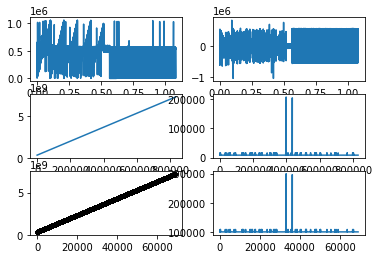

In [10]:
#%% Load all the data from NeuropixelsV1e workflow

suffix = '2024-03-04T18_04_11'; # Change to match file names' suffix

# Neuropixels V1 Probe
npix = {}
npix['frame-counter'] = np.fromfile(os.path.join(folder,fileBaseNames["NP_FrameCounter"] + suffix + '.raw'), dtype=np.int32)

npix['spike'] = np.fromfile(os.path.join(folder,fileBaseNames["NP_spk"] + suffix + '.raw'), dtype=np.uint16).reshape(-1, 384)
npix['spike-clock'] = np.fromfile(os.path.join(folder,fileBaseNames["NP_spkTS"] + suffix + '.raw'), dtype=np.uint64)

npix['lfp'] = np.fromfile(os.path.join(folder,fileBaseNames["NP_LFPdata"] + suffix + '.raw'), dtype=np.uint16).reshape(-1, 384)
npix['lfp-clock'] = np.fromfile(os.path.join(folder,fileBaseNames["NP_LFPTS"] + suffix + '.raw'), dtype=np.uint64)


#%% Ensure Counters are correct

plt.close('all')

ax = plt.subplot(3,2,1)
ax.plot(npix['frame-counter'])

ax = plt.subplot(3,2,2)
ax.plot(np.diff(npix['frame-counter']))

ax = plt.subplot(3,2,3)
ax.plot(npix['spike-clock'])

ax = plt.subplot(3,2,4)
ax.plot(np.diff(npix['spike-clock']))

ax = plt.subplot(3,2,5)
ax.plot(npix['lfp-clock'], 'k.')

ax = plt.subplot(3,2,6)
ax.plot(np.diff(npix['lfp-clock']))


if ~np.all(np.diff(npix['frame-counter']) == 1):
    print("ERROR: Skipped frame detected.")
    
print('Spike sample rate: {}'.format(250e6 / np.mean(np.diff(npix['spike-clock']))))
print('LFP sample rate: {}'.format(250e6 / np.mean(np.diff(npix['lfp-clock']))))


#%% 

#plt.close('all')
#plt.plot(npix['spike'])




